In [52]:
!pip install pandas_datareader
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
pd.options.display.width = 0

In [53]:
stock = pd.read_csv('Downloads/PRICES.csv')

In [54]:
stock.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [55]:
stock.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600
4391,2017/9/8,112.300003,114.790001,112.010002,113.190002,113.190002,1611700


In [8]:
stock.shape

(4392, 7)

In [56]:
stock.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03
mean,30.562539,30.893618,30.238833,30.572580,30.572580,1.884027e+06
std,29.914758,30.210974,29.615761,29.905778,29.905778,1.621609e+06
min,3.296875,3.390625,3.000000,3.250000,3.250000,1.904000e+05
25%,8.718125,8.803125,8.625000,8.712500,8.712500,1.088800e+06
50%,14.766250,14.981250,14.662500,14.767500,14.767500,1.539300e+06
75%,42.546248,43.051249,42.086249,42.539999,42.539999,2.188900e+06
max,121.080002,121.750000,120.169998,121.360001,121.360001,4.641260e+07


In [57]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [58]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [59]:
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [60]:
close_px = stock['Adj_Close']
mavg = close_px.rolling(window=100).mean()
print (mavg)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4387    113.2886
4388    113.4698
4389    113.6491
4390    113.8157
4391    114.0000
Name: Adj_Close, Length: 4392, dtype: float64


In [61]:
import matplotlib.pyplot as plt
from matplotlib import style

In [62]:
import matplotlib as mpl

In [63]:
dfreg = stock.loc[:,['Adj_Close','Volume']]

In [64]:
import math
import numpy as np

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

In [23]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [24]:
dfreg.fillna(value=-99999, inplace=True)

In [26]:
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [27]:
forecast_col = 'Adj_Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)

In [28]:
X = np.array(dfreg.drop(['label'], 1))

In [29]:
X = preprocessing.scale(X)

In [30]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [31]:
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
train, test = train_test_split(stock, test_size=0.20)

In [35]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [36]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)

In [37]:
clfreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [38]:
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())

In [39]:
clfpoly2.fit(X_train, y_train)

C:\Users\shivangi pandey\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.65027e-18): result may not be accurate.
  overwrite_a=True).T


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [40]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)

In [41]:
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [42]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [43]:
y_pred_reg = clfreg.predict(X_test)

In [44]:
y_pred_poly2 = clfpoly2.predict(X_test)

In [45]:
y_pred_knn = clfknn.predict(X_test)

In [46]:
print (y_pred_reg)

[ 5.89316073e+01  6.91180637e+01  7.24521849e+01  3.50609354e+01
  5.50042988e+01  6.32066462e+01  2.32790100e+01  5.01974369e+01
  3.80610541e+00  6.08748068e+01  4.26087314e+01  4.00518899e+01
 -1.00748339e-01  6.15089035e+01  4.99247985e+00  1.13948109e+01
  5.71520456e+01 -1.17804001e+01  3.33222832e+01 -2.84168238e+00
  3.47950239e+01  4.63110378e+01 -6.32571363e-01  1.98221603e+01
  7.26567322e+01  3.29745528e+01  1.47698416e+01  3.98268879e+01
  8.42887477e+00  2.31767363e+01  6.86476048e+01 -1.22304042e+01
  6.61930370e+01  2.71449543e+01 -1.23940421e+01  5.03201652e+01
  5.85429674e+01  7.14703578e+01  1.90381537e+00  4.07201692e+00
  2.83108740e+01 -1.29258651e+01  4.67814967e+01  3.04586208e+01
 -2.61668034e+00  5.88702431e+01  3.91927912e+01  4.35838317e+00
 -3.82350950e+00  6.81157818e+01  3.25450034e+01  5.82566011e+01
  1.94130657e+01  3.58791247e+01 -4.47806092e+00  3.44063840e+01
 -1.37440544e+01  5.68794073e+00  1.52198457e+01  1.24175474e+01
  3.98677974e+01  4.85406

In [47]:
print (y_pred_poly2)

[ 61.75170336  85.88378417  94.7024342   21.79260346  53.57899022
  71.36367133  10.64255265  44.43275681   4.6350285   66.02830439
  31.9131307   28.22433409   5.29387078  67.45717943   4.55827872
   5.13564684  57.97044069  10.97875229  19.79082939   6.1279604
  21.47845745  37.72743876   5.43173208   8.44617571  95.25822781
  19.40528088   6.11346622  27.91249405   4.66017056  10.57056926
  84.67596381  11.30918183  78.52081837  13.67660884  11.43138734
  44.65454534  60.91487822  92.05839689   4.87800333   4.61283076
  14.71137287  11.83610355  38.50633758  16.76276229   6.04793735
  61.61916322  27.04478965   4.59215317   6.50133382  83.32148012
  18.93582903  60.30221515   8.21852615  22.77730883   6.77210879
  21.02451257  12.48128634   4.53999687   6.2789708    5.38285758
  27.96903854  41.4987847   57.33156323  77.66872632   7.4953273
   7.97569251   5.11771436  86.14754925 102.87062716  71.12501035
  44.58054752  47.74727127  19.38275525   5.72310915  30.13876857
  63.8932487

In [48]:
print (y_pred_knn)

[ 42.677502   99.744999   90.7649995  19.40125    35.4449995  68.2225
  12.075      48.0025005   7.34625    62.0424995  42.0424995  32.6949995
   6.3475     65.8050005   7.55375    10.74375    33.9799995   5.109375
  16.4250005   5.75625    17.6475     36.695       6.645      10.96625
  93.4850005  16.0375     10.30125    33.7074985   9.03875    12.50375
 104.794998    5.703125   79.6799965  13.01        5.53125    43.772501
  40.389999   83.5750005   7.445       7.275      16.2887505   5.03125
  37.4449995  12.09625     4.9575     42.6125015  28.79        7.18375
   6.7125    105.975002   15.75875    42.2875005  11.05       21.87625
   7.035      16.8850005   3.8046875   8.16375    10.48125    11.01625
  33.7074985  47.800001   32.9400005  75.2425005   6.28875     6.4275
  10.765      97.040001  113.         70.7524985  43.772501   43.094999
  15.9412505  11.10125    42.         49.005001    7.17375   113.665001
  16.8825     42.365      31.55        6.54625    10.40375     6.33
  11.

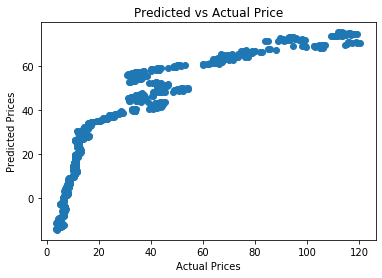

In [49]:
plt.scatter(y_test, y_pred_reg)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')
plt.show()

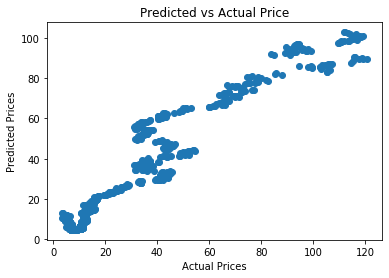

In [50]:
plt.scatter(y_test, y_pred_poly2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')
plt.show()

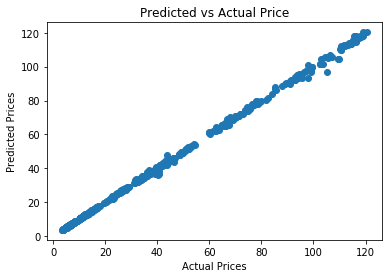

In [51]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')
plt.show()